# Part I : Tendem Approach

## Importing the requiered libraries.

In [ ]:
!pip install -qq coclust

In [ ]:
!pip install -qq scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.1 MB/s 


In [ ]:
!pip install -qq umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 26.3 MB/s 


In [ ]:
!pip install -qq umap-learn[plot]

     |████████████████████████████████| 15.8 MB 3.8 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 136 kB 47.2 MB/s 
     |████████████████████████████████| 837 kB 46.0 MB/s 
     |████████████████████████████████| 830 kB 47.9 MB/s 
     |████████████████████████████████| 822 kB 17.1 MB/s 
     |████████████████████████████████| 802 kB 49.5 MB/s 
     |████████████████████████████████| 802 kB 38.4 MB/s 
     |████████████████████████████████| 793 kB 40.5 MB/s 
     |████████████████████████████████| 793 kB 48.8 MB/s 
     |████████████████████████████████| 791 kB 49.9 MB/s 
     |████████████████████████████████| 786 kB 5.9 MB/s 
     |████████████████████████████████| 779 kB 40.0 MB/s 
     |████████████████████████████████| 778 kB 44.1 MB/s 
     |████████████████████████████████| 776 kB 45.7 MB/s 
     |████████████████████████████████| 769 kB 38.4 MB/s 
     |████████████████████████████████| 766 kB 46.2 MB/s 
     |███████████

In [ ]:
!pip install -q rpy2

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
import spacy
from gensim.models import KeyedVectors
from wordcloud import WordCloud

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from coclust.clustering.spherical_kmeans import SphericalKmeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import umap
import umap.plot
from umap.umap_ import nearest_neighbors

from gensim.models import KeyedVectors



## Functions for clustering and evaluation
These function applies the clustering on the given data and return the evaluation with the **NMI** and **ARI** metrics

### **KMeans++ function**

In [ ]:
def KMean_clust(k,texts_w2v,true_labels):
  scores = []
  # Init model
  km_model = KMeans(n_clusters=k,init="k-means++")
  # Predict
  km_model_preds = km_model.fit(texts_w2v).labels_
  # Evaluate NMI
  nmi_score = normalized_mutual_info_score(true_labels,km_model_preds)
  scores.append(nmi_score)
  # Evaluate ARI
  ari_score = adjusted_rand_score(true_labels,km_model_preds)
  scores.append(ari_score)

  return scores, km_model

### **Spherical KMeans function**

In [ ]:
def Spherical_KMeans_clust(k,texts_w2v,true_labels):
  scores = []
  # Init model
  spher_km_model = SphericalKmeans(n_clusters=k,n_init=8)
  spher_km_model.fit(texts_w2v)
  # Predict
  spher_km_preds = spher_km_model.labels_
  # Evaluate NMI
  nmi_score = normalized_mutual_info_score(true_labels,spher_km_preds)
  scores.append(nmi_score)
  # Evaluate ARI
  ari_score = adjusted_rand_score(true_labels,spher_km_preds)
  scores.append(ari_score)

  return scores, spher_km_model

### **KMedoids function**

In [ ]:
def KMedoids_clust(k,texts_w2v,true_labels):
  scores = []
  # Init
  # Using pam method for kmedoids rather than alternate cause it's more accurate
  kmedoids_model = KMedoids(n_clusters=k, random_state=0,method="pam")
  # Predict
  kmedoids_preds = kmedoids_model.fit(texts_w2v).labels_
  # Evaluate NMI
  nmi_score = normalized_mutual_info_score(true_labels,kmedoids_preds)
  scores.append(nmi_score)
  # Evaluate ARI
  ari_score = adjusted_rand_score(true_labels,kmedoids_preds)
  scores.append(ari_score)

  return scores, kmedoids_model

### CAH Clustering

In [ ]:
def CAH_clust(k,texts_w2v,true_labels,AggCritarion):
  scores = []
  # Init
  # Using pam method for CAH rather than alternate cause it's more accurate
  CAH_model = AgglomerativeClustering(n_clusters=k, compute_distances=True,affinity='euclidean', linkage=AggCritarion)
  # Predict
  CAH_preds = CAH_model.fit(texts_w2v).labels_
  # Evaluate NMI
  nmi_score = normalized_mutual_info_score(true_labels,CAH_preds)
  scores.append(nmi_score)
  # Evaluate ARI
  ari_score = adjusted_rand_score(true_labels,CAH_preds)
  scores.append(ari_score)

  return scores, CAH_model

### **Total Clustering**
A function that runs all the clustering functions on given data and returns the evaluations

In [ ]:
def total_clust(k,texts_w2v,true_labels):
  scores = dict()
  models = dict()
  # Kmeans++
  score_kmeans, model_kmeans = KMean_clust(k,texts_w2v,true_labels)
  scores["kmeans"] = score_kmeans
  models["kmeans"] = model_kmeans

  # Spherical Kmeans
  score_spherical, model_spherical = Spherical_KMeans_clust(k,texts_w2v,true_labels)
  scores["spherical"] = score_spherical
  models["spherical"] = model_spherical

  # Kmedoids
  score_kmedoids, model_kmedoids = KMedoids_clust(k,texts_w2v,true_labels)
  scores["kmedoids"] = score_kmedoids
  models["kmedoids"] = model_kmedoids

  #CAH Using single Agregation cretarion
  score_CAHSingle, model_CAHSingle = CAH_clust(k,texts_w2v,true_labels,'single')
  scores["CAHSingle"] = score_CAHSingle
  models["CAHSingle"] = model_CAHSingle

  #CAH Using average Agregation cretarion
  score_CAHAverage, model_CAHAverage = CAH_clust(k,texts_w2v,true_labels,'average')
  scores["CAHAverage"] = score_CAHAverage
  models["CAHAverage"] = model_CAHAverage

  #CAH Using complete Agregation cretarion
  score_CAHComplete, model_CAHComplete = CAH_clust(k,texts_w2v,true_labels,'complete')
  scores["CAHComplete"] = score_CAHComplete
  models["CAHComplete"] = model_CAHComplete

  #CAH Using WARD Agregation cretarion
  score_CAHWard, model_CAHWard = CAH_clust(k,texts_w2v,true_labels,'ward')
  scores["CAHWard"] = score_CAHWard
  models["CAHWard"] = model_CAHWard

  return scores, models

In [ ]:
def SyntTable(scores):
  tableauSynt =pd.DataFrame(scores)
  tableauSynt=tableauSynt.set_axis(['NMI','ARI'], axis='index')
  return tableauSynt

## Importing data
We import the data that's stored in a public github repo

* Classic3 : https://raw.githubusercontent.com/faycelgnfd/Advanced-DS-Project/master/classic3.csv
* Classic4 : https://raw.githubusercontent.com/faycelgnfd/Advanced-DS-Project/master/classic4.csv
* BBC : https://raw.githubusercontent.com/faycelgnfd/Advanced-DS-Project/master/bbc.csv



In [ ]:
# Importing Data
# Classic3
data_link3 = "https://raw.githubusercontent.com/faycelgnfd/Advanced-DS-Project/master/classic3.csv"
df3 = pd.read_csv(data_link3,index_col=0)

# Classic4
data_link4 = "https://raw.githubusercontent.com/faycelgnfd/Advanced-DS-Project/master/classic4.csv"
df4 = pd.read_csv(data_link4,index_col=0)

# BBC
data_link_bbc = "https://raw.githubusercontent.com/faycelgnfd/Advanced-DS-Project/master/bbc.csv"
df_bbc = pd.read_csv(data_link_bbc,index_col=0)

In [ ]:
# Extracting text data and labels
# Classic3
texts = df3["text"]
labels = df3["label"]

# Classic4
texts4 = df4["text"]
labels4 = df4["label"]

# BBC
texts_bbc = df_bbc["text"]
labels_bbc = df_bbc["label"]


In [ ]:
# Getting the number of classes
# Classic 3
labels_unq = np.unique(labels)
k = len(labels_unq)

# Classic 3
labels_unq_4 = np.unique(labels4)
k4 = len(labels_unq_4)

# Classic 3
labels_unq_bbc = np.unique(labels_bbc)
k_bbc = len(labels_unq_bbc)

print(k,k4,k_bbc)

3 4 5


In [ ]:
# Lookup at the data
df4.shape

(7095, 2)

Text(0.5, 1.0, 'BBC classes distribution')

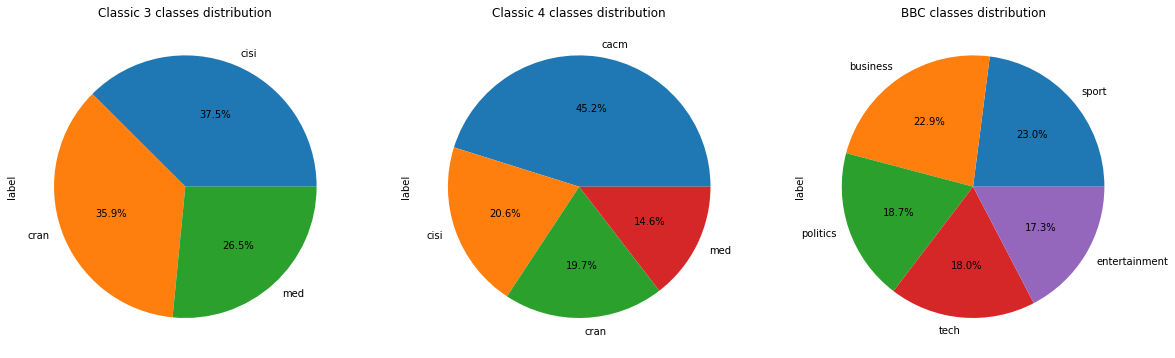

In [ ]:
plt.figure(figsize=[20,14])

plt.subplot(1,3,1)
labels.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Classic 3 classes distribution")

plt.subplot(1,3,2)
labels4.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Classic 4 classes distribution")

plt.subplot(1,3,3)
labels_bbc.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("BBC classes distribution")

## Preprocessing

### Getting the stop words
We import the english stop words that we're going to use to clean our data

In [ ]:
# getting english stop words
stop_words = list(ENGLISH_STOP_WORDS)
stop_words += ["ca","nt","'s"]
stop_words[5:10]

['those', 'detail', 'etc', 'why', 'much']

### Tokenization
Creating a tokenizer function to isolate each word in order to numerize it (using spacy), the tokenizer removes the punctiations from the textes which provides a better cleaning

In [ ]:
# Create a tokenizer
nlp = spacy.load("en_core_web_sm")
def tokenizer_spacy(text):
  '''
    return a list of tokens of the given text
  '''
  tokens = []
  for token in nlp.tokenizer(text):
    if len(token) >= 2 and not token.is_punct:
      tokens.append(token.text)
  return tokens

tokenizer_spacy("sentence, to tokenize as exemple...")

['sentence', 'to', 'tokenize', 'as', 'exemple']

### Word2Vec
It's well known that machine learning algorithmes only takes numerical data as inputs, so we have to process our text data in order to train our models with it.

Here we're using the **Word Embeddings** method that transforms each word into a vector of numbers, in oposit to the **Bag of words** methods, word embeddings do preserve the contexts of the words in the vectors.
> **Here we'll use an available pre trained model that for our vectorization**

In [ ]:
# load word2vec model
model_link = "/content/drive/MyDrive/Utils/GoogleNews-vectors-negative300.bin.gz"
w2v_model = KeyedVectors.load_word2vec_format(model_link,binary=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function that return the vector of the given word
def get_w2v_vector(word):
  if word in w2v_model:
    return w2v_model[word]
  else:
    return None

We can see that the word2vec model's vectors have a **dimension of 300**, means each word is represented with a vector of 300 real numbers

In [ ]:
get_w2v_vector("king").shape

(300,)

### Stemming
Stemming is a phase of preprocessing where we modify words and turn them to their root by applying transformations like removing prefixes or suffixes...

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

### Vectorizing the docs
We can vectorize our docs (texts data) by computing the mean of the vectors (words) that constitute the doc

In [ ]:
def static_document_embeddings(W2v_function,docs,tokenizer,stop_words,stemmer,n_dim=300):
  '''
    function that calculates the mean vector of each doc
  '''
  doc_vectors = []
  for doc in docs:
    tokens = tokenizer_spacy(doc)
    vectors = []
    for token in tokens:
      if token not in stop_words:
        token = stemmer.stem(token)
        vector = W2v_function(token)
        if vector is not None:
          vectors.append(vector)
        else:
          pass
      else:
        pass
    if len(vectors) > 0:
      doc_vector = np.array(vectors).mean(axis=0)
    else:
      doc_vector = np.zeros(n_dim)
    doc_vectors.append(doc_vector)
  return np.array(doc_vectors)

**Now we have a vector that represent each doc obtained by computing the mean of the word embeddings that compose each doc**

In [ ]:
# Classic3
X_w2v = static_document_embeddings(get_w2v_vector,texts,tokenizer_spacy,stop_words,stemmer,300)

# Classic4
X_w2v_4 = static_document_embeddings(get_w2v_vector,texts4,tokenizer_spacy,stop_words,stemmer,300)

# Classic BBC
X_w2v_bbc = static_document_embeddings(get_w2v_vector,texts_bbc,tokenizer_spacy,stop_words,stemmer,300)

## Visualisation

### Word Clouds

In [ ]:
# Function that return the word cloud of each class of the dataset
from wordcloud import WordCloud
def wordclouds(dataset,background_color,stop_words,max_words=50):
  clouds = dict()
  classes = np.unique(dataset["label"])
  text = ""
  for cls in classes:
    df = dataset[dataset["label"]==cls]
    for t in df["text"]:
      text = text + t
    wc = WordCloud(background_color=background_color, stopwords=stop_words, max_words=max_words).generate(text)
    clouds[cls] = wc
  return clouds


In [ ]:
# Function that plots multiple wordclouds
def plot_wordclouds(wordclouds):
  classes = wordclouds.keys()
  if len(classes)%3 == 0:
    nrows = int(len(classes)/3)
  else:
    nrows = int(len(classes)/3+1)
  fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(20,7))
  axs = axs.flatten()
  for ax, cls in zip(axs, classes):
    ax.imshow(wordclouds[cls])
    ax.set_title("WordCloud for class "+cls)
    ax.axis("off")

In [ ]:
wordclouds3 = wordclouds(df3,"white",stop_words,50)

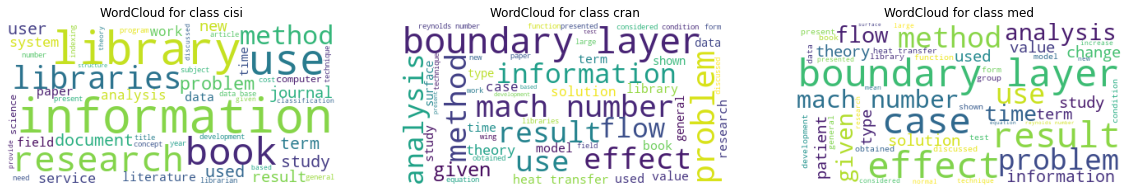

In [ ]:
plot_wordclouds(wordclouds3)

In [ ]:
wordclouds4 = wordclouds(df4,"white",stop_words,50)

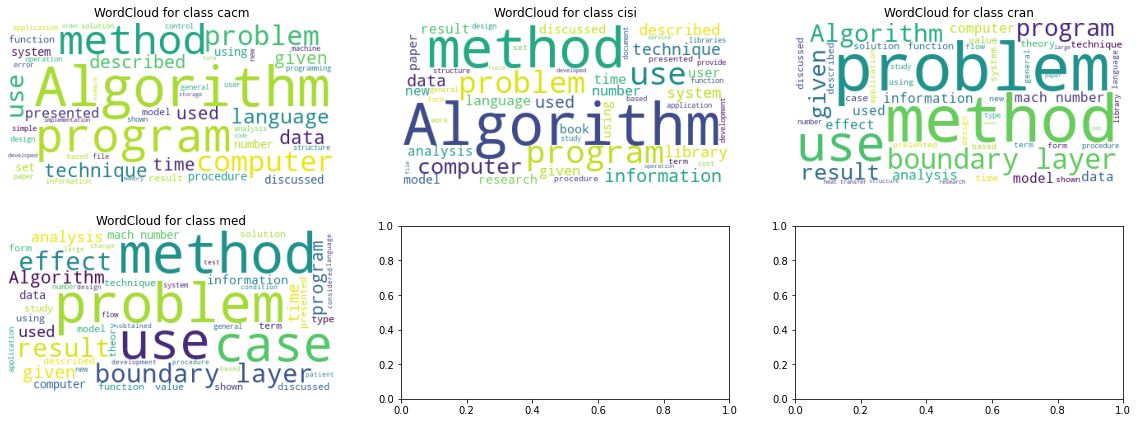

In [ ]:
plot_wordclouds(wordclouds4)

In [ ]:
wordclouds_bbc = wordclouds(df_bbc,"white",stop_words,50)

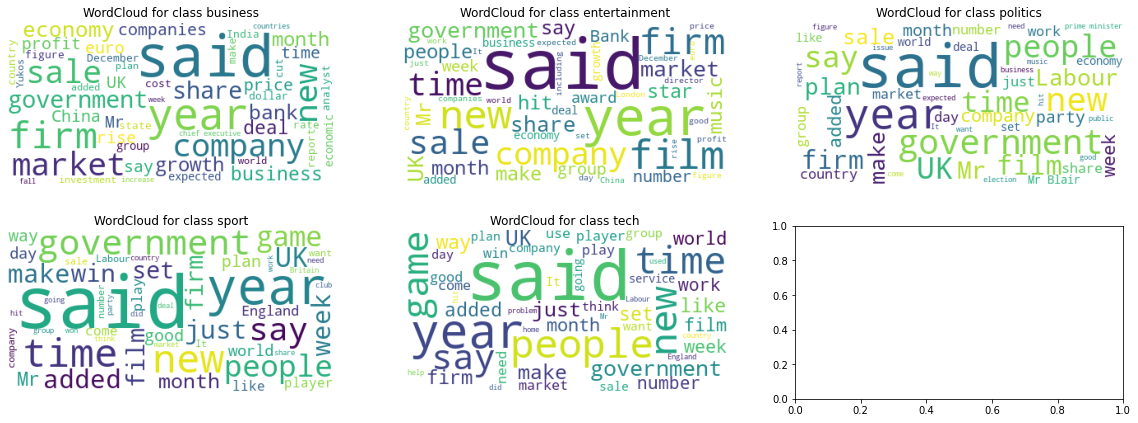

In [ ]:
plot_wordclouds(wordclouds_bbc)

### Visiualisation functions

In [ ]:
def plot_2D(data_matrix, labels=None, title=''):
  '''
    A function that plots our data clusters in 2D dimensions
  '''
  colors_init = ['red', 'green', 'blue', 'yellow', 'purple']
  nb_labels = len(np.unique(labels))
  if labels is not None:
    int_labels = LabelEncoder().fit_transform(labels)
    colors = [colors_init[i] for i in range(nb_labels)]
    c = [colors[i] for i in int_labels]
  else:
    c = 'tab:blue'

  fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
  ax1.scatter(data_matrix[:, 0], data_matrix[:, 1], s=3, c=c)
  ax1.set_title(title)

  plt.show()

In [ ]:
import plotly.express as px
def plot_3D(data_matrix, labels=None, title=''):
  '''
    A function that plots our data clusters in 3D dimensions
  '''
  colors_init = ['red', 'green', 'blue', 'yellow', 'purple']
  nb_labels = len(np.unique(labels))
  if labels is not None:
    int_labels = LabelEncoder().fit_transform(labels)
    colors = [colors_init[i] for i in range(nb_labels)]
    c = [colors[i] for i in int_labels]
  else:
    c = 'tab:blue'

  fig = px.scatter_3d(
      data_matrix, data_matrix[:, 0], data_matrix[:, 1], data_matrix[:, 2],
      color=c,labels={'color': "labels"})
  fig.update_traces(marker_size=8)
  fig.show()

>We don't have to go through **standarization** when using word embedding because as we can see, the values ar between **-1 and 1**

In [ ]:
print("Classic3 max values : {}, min value : {}".format(X_w2v.max(),X_w2v.min()))
print("Classic4 max values : {}, min value : {}".format(X_w2v_4.max(),X_w2v_4.min()))
print("BBC max values : {}, min value : {}".format(X_w2v_bbc.max(),X_w2v_bbc.min()))

Classic3 max values : 0.3541148900985718, min value : -0.3834339380264282
Classic4 max values : 0.71484375, min value : -0.8828125
BBC max values : 0.20989364385604858, min value : -0.23145541548728943


### Using PCA
Here we're gonna use pca to visualize our data points by reducing the dimensionality to 2 and 3

In [ ]:
# Applying the reduction
pca_2d = PCA(n_components=2)
X_w2v_2d = pca_2d.fit_transform(X_w2v)
pca_2d = PCA(n_components=2)
X_w2v_4_2d = pca_2d.fit_transform(X_w2v_4)
pca_2d = PCA(n_components=2)
X_w2v_bbc_2d = pca_2d.fit_transform(X_w2v_bbc)

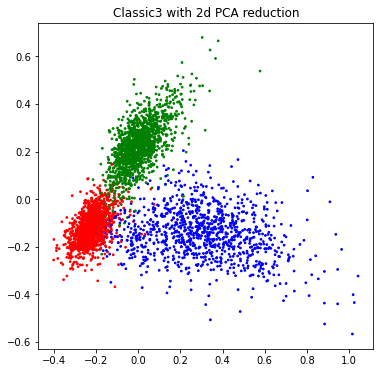

In [ ]:
plot_2D(X_w2v_2d,labels,'Classic3 with 2d PCA reduction')

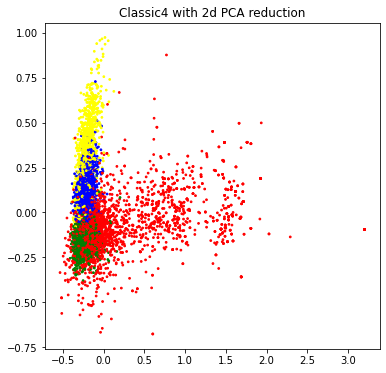

In [ ]:
plot_2D(X_w2v_4_2d,labels4,'Classic4 with 2d PCA reduction')

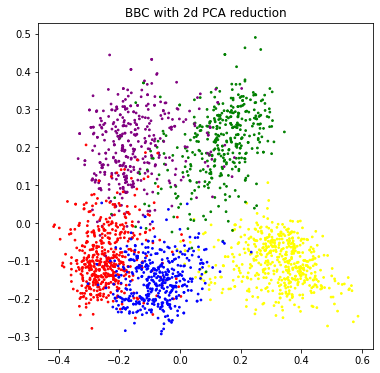

In [ ]:
plot_2D(X_w2v_bbc_2d,labels_bbc,'BBC with 2d PCA reduction')

In [ ]:
# Applying 3d reduction
pca_3d = PCA(n_components=3)
X_w2v_3d = pca_3d.fit_transform(X_w2v_bbc)

In [ ]:
plot_3D(X_w2v_3d, labels_bbc, "Classic3 With 3d PCA reduction")

## **Clustering**
Here we are gonna use the ```total_clust``` written earlier, to cluster the given data and return the scores (NMi and ARI) for each clustering methode

In [ ]:
import time

In [ ]:
# Clustering Classic3 dataset

# computing the clustering time
start_time = time.time()

scores3, models3 = total_clust(k,X_w2v,labels)

exec_time3 = time.time() - start_time

> **Synthetic table for Classic3**

In [ ]:
tab3 = SyntTable(scores3)
tab3.style.set_caption("Synthetic table for Classic3")
print("Total clustering time for  Classic3 : {:.2f}s".format(exec_time3))
tab3

Total clustering time for  Classic3 : 39.01s


kmeans  spherical  kmedoids  CAHSingle  CAHAverage  CAHComplete  \
NMI  0.874048    0.91626  0.787364   0.000923    0.006033     0.834992   
ARI  0.910192    0.94807  0.827069  -0.000108    0.001041     0.864878   

      CAHWard  
NMI  0.969599  
ARI  0.984569

In [ ]:
# Clustering Classic4 dataset

# computing the clustering time
start_time = time.time()

scores4, models4 = total_clust(k4,X_w2v_4,labels4)

exec_time_4 = time.time() - start_time

In [ ]:
# Clustering BBC dataset

# computing the clustering time
start_time = time.time()

scores_bbc, models_bbc = total_clust(k_bbc,X_w2v_bbc,labels_bbc)

exec_time_bbc = time.time() - start_time

>**Synthetic table for BBC**

In [ ]:
tab_bbc = SyntTable(scores_bbc)
tab_bbc.style.set_caption("Synthetic table for BBC")
print("Total clustering time for  Classic3 : {:.2f}s".format(exec_time_bbc))
tab_bbc

Total clustering time for  Classic3 : 26.24s


kmeans  spherical  kmedoids  CAHSingle  CAHAverage  CAHComplete  \
NMI  0.815611   0.705026  0.811231   0.003276    0.017655     0.378727   
ARI  0.822482   0.593669  0.823788  -0.000236   -0.001062     0.165501   

      CAHWard  
NMI  0.816262  
ARI  0.832835

### **Visualizing clustering results**

**It would be interesting to compare the result of the clustering with the initial distribution**

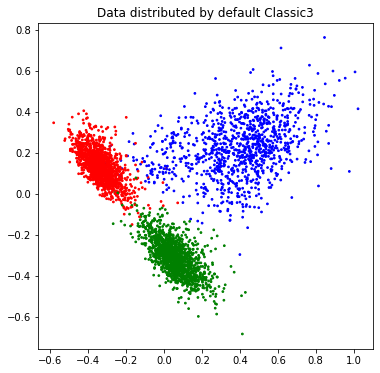

In [ ]:
# initial distribution
plot_2D(X_w2v_2d,labels,"Data distributed by default Classic3")

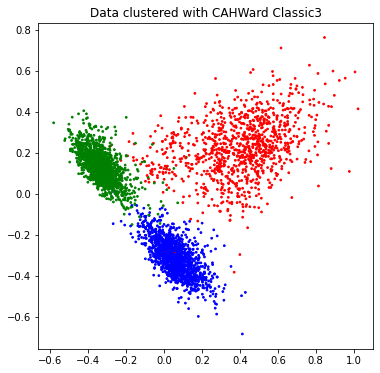

In [ ]:
# CAH Ware
cahWard_pred = models3["CAHWard"].labels_
plot_2D(X_w2v_2d,cahWard_pred,"Data clustered with CAHWard Classic3")

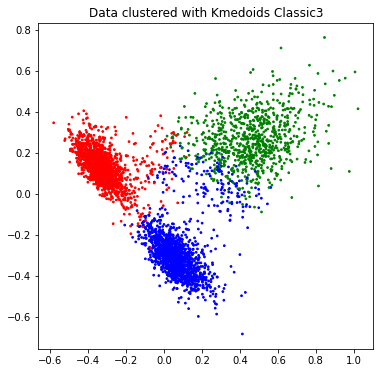

In [ ]:
# Kmedois
kmedoids_pred = models3["kmedoids"].labels_
plot_2D(X_w2v_2d,kmedoids_pred,"Data clustered with Kmedoids Classic3")

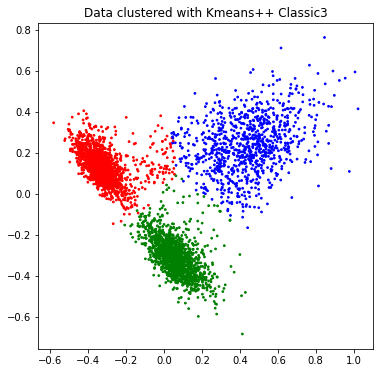

In [ ]:
# Kmeans++
kmeans_pred = models3["kmeans"].labels_
plot_2D(X_w2v_2d,kmeans_pred,"Data clustered with Kmeans++ Classic3")

**We can see by comparing the clustering results and the default distribution that the clustering scores are reflected ont the plots, such as we have a good clustering with the the CAH Ward method.**

**We cannot say the same about the kmedoids methode since we have non homogenuous clusters where we can see data assigned to the wrong clusters**

## **Dimensionality Reduction**
In this part we're gonna apply different dimensionality reduction methodes to our datasets before applying the clustering then compare the different results (Scores and clustering times).

### Using PCA

Using PCA, we can reduce the number of features by using the extracted Principal Components instead


In [ ]:
# Fit the PCA
pca = PCA().fit(X_w2v)
# Get the variance ratios
(np.array(pca.explained_variance_ratio_)*100)[:5]

array([20.171055 , 13.110241 ,  4.0056443,  2.9498565,  2.708422 ],
      dtype=float32)

We can observe the amount of information preserved with each PC, above, we have percentage of the information for the first five PCs. (20,7% for the first, 13,29% for the second... ect)

To get the optimal number of Principal Components we can use the **Scree plot**, Such as it informs us of the number of PCs to use to have a certain amount of information saved

In [ ]:
# Getting the cummulated variance ratio
# Classic3
pca = PCA().fit(X_w2v)
evr3 = np.cumsum(pca.explained_variance_ratio_)*100

# Classic4
pca = PCA().fit(X_w2v_4)
evr4 = np.cumsum(pca.explained_variance_ratio_)*100

# BBC
pca = PCA().fit(X_w2v_bbc)
evr_bbc = np.cumsum(pca.explained_variance_ratio_)*100

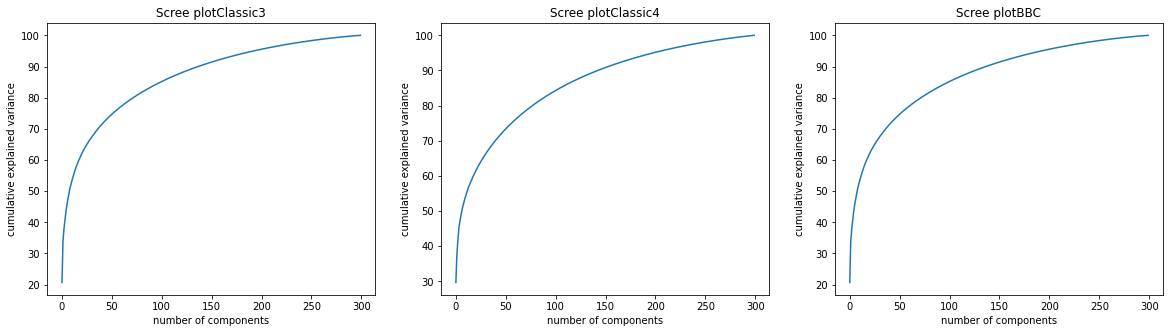

In [ ]:
#Ploting Scree plots
evrs = [evr3, evr4, evr3]
dfs = ["Classic3", "Classic4", "BBC"]
fig = plt.figure(figsize=[20,5])
for evr, df, i in zip(evrs,dfs,range(1,4)):
  plt.subplot(1,3,i)
  plt.plot(evr)
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance')
  plt.title("Scree plot" + df)

We can see tha for the 3 of our datasets, have a similar scree plot where we have an equivalent of 100 PCs to have 85% of saved informations with a reduced dimension. So we'll use 100 PCs for the 3 datasets reduction

In [ ]:
pca = PCA(n_components=100,whiten=True)

# Classic3
X_w2v_pca = pca.fit_transform(X_w2v)

# Classic4
X_w2v_4_pca = pca.fit_transform(X_w2v_4)

# BBC
X_w2v_bbc_pca = pca.fit_transform(X_w2v_bbc)

In [ ]:
# Clustering Classic3 dataset reduced with pca

# computing the clustering time
start_time = time.time()

scores3_pca, models3_pca = total_clust(k,X_w2v_pca,labels)

exec_time3 = time.time() - start_time

>**Synthetic table for Classic3 reduced with pca**

In [ ]:
tab3 = SyntTable(scores3_pca)
tab3.style.set_caption("Synthetic table for Classic3 reduced with pca")
print("Total clustering time for  Classic3 : {:.2f}s".format(exec_time3))
tab3

Total clustering time for  Classic3 : 29.66s


kmeans  spherical  kmedoids  CAHSingle  CAHAverage  CAHComplete  \
NMI  0.704125   0.356310  0.037345   0.000923    0.001085     0.001291   
ARI  0.600742   0.366863  0.045596  -0.000108    0.000062     0.000188   

      CAHWard  
NMI  0.832860  
ARI  0.883707

In [ ]:
# Clustering BBC dataset reduced with pca

# computing the clustering time
start_time = time.time()

scores_bbc_pca, models_bbc_pca = total_clust(k,X_w2v_bbc_pca,labels_bbc)

exec_time_bbc = time.time() - start_time

>**Synthetic table for BBC reduced with pca**

In [ ]:
tab_bbc = SyntTable(scores_bbc_pca)
tab_bbc.style.set_caption("Synthetic table for BBC reduced with pca")
print("Total clustering time for  BBC : {:.2f}s".format(exec_time_bbc))
tab_bbc

Total clustering time for  Classic3 : 36.58s


kmeans  spherical  kmedoids  CAHSingle  CAHAverage  CAHComplete  \
NMI  0.205866   0.147402  0.083966   0.001645    0.001645     0.005718   
ARI  0.084305   0.122222  0.055980  -0.000120   -0.000120    -0.000394   

      CAHWard  
NMI  0.395042  
ARI  0.172851

By comparing the synthetic tables of the clustering scores between the reduced data and the original data, we notice that the clustering performance really decreased even though we preserved 85% of the information. Especially int the bbc dataset were the NMI of the CAHWard clustering went from **81%** to **39%**

###**Using TSNE**
**Reduce the dimension of our vectors using TSNE, then recluster our datapoints**

**Unlike PCA, t-SNE lets us reduce the dimensionality only to 3 or 2 dimensions**

---



In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

# we're using Clasic3 dataset for this exemple
X_w2v_tsne = tsne.fit_transform(X_w2v)

>**Visualizing the data with t-SNE reduction**

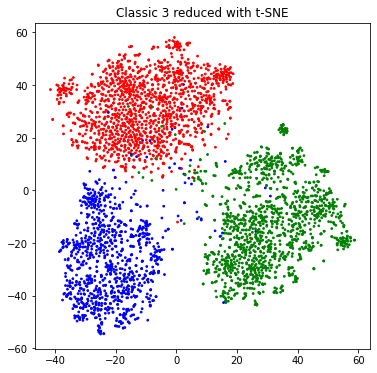

In [ ]:
plot_2D(X_w2v_tsne,labels,"Classic 3 reduced with t-SNE")

>**Clustering using reduced t-SNE reduced data**

In [ ]:
# Clustering Classic3 dataset reduced with t-SNE

# computing the clustering time
start_time = time.time()

scores3_tsne, models3_tsne = total_clust(k,X_w2v_tsne,labels)

exec_time3 = time.time() - start_time

>**Synthetic table for Classic3 reduced with t-SNE**

In [ ]:
tab3_tsne = SyntTable(scores3_tsne)
tab3_tsne.style.set_caption("Synthetic table for Classic3 reduced with t-SNE")
print("Total clustering time for  Classic3 : {:.2f}s".format(exec_time3))
tab3_tsne

Total clustering time for  Classic3 : 7.98s


kmeans  spherical  kmedoids  CAHSingle  CAHAverage  CAHComplete  \
NMI  0.919168   0.920426  0.916511   0.013077    0.861108     0.887568   
ARI  0.949643   0.951934  0.948378  -0.000661    0.895410     0.919235   

      CAHWard  
NMI  0.907847  
ARI  0.939085

>**Kmeans++ Clustering on t-SNE reduced data**

In [ ]:
labels_tsne_pred = models3_tsne["kmeans"].labels_

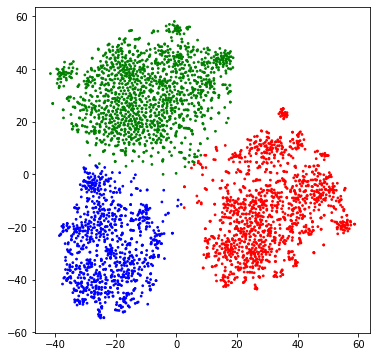

In [ ]:
plot_2D(X_w2v_tsne, labels_tsne_pred)

In [ ]:
# the  divergence of Kullback-Leibler whitch represents the lost after optimisation 
tsne.kl_divergence_

1.9169197082519531

### **Using UMAP**
**Reduce the dimension of our vectors using UMAP, then recluster our datapoints**

In [ ]:
# we're using Classic3 dataset for this exemple
UMAP2 = umap.UMAP(n_components=2, n_jobs=-1)

In [ ]:
X_w2v_bbc_umap = UMAP2.fit_transform(X_w2v_bbc)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


>**Visualizing the data with t-SNE reduction**

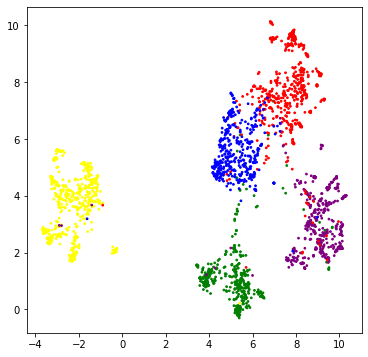

In [ ]:
plot_2D(X_w2v_bbc_umap,labels_bbc)

>**Clustering using reduced t-SNE reduced data**

In [ ]:
# Clustering BBC dataset reduced with UMAP

# computing the clustering time
start_time = time.time()

scores_bbc_umap, models_bbc_umap = total_clust(k_bbc,X_w2v_bbc_umap,labels_bbc)

exec_time_bbc = time.time() - start_time

>**Synthetic table for BCC reduced with UMAP**

In [ ]:
tab_bbc_umap = SyntTable(scores_bbc_umap)
tab_bbc_umap.style.set_caption("Synthetic table for BBC reduced with UMAP")
print("Total clustering time for  BBC : {:.2f}s".format(exec_time_bbc))
tab_bbc_umap

Total clustering time for  BBC : 4.03s


kmeans  spherical  kmedoids  CAHSingle  CAHAverage  CAHComplete  \
NMI  0.833412   0.603242  0.832523   0.470030    0.837309     0.835627   
ARI  0.856804   0.521230  0.856086   0.228595    0.863224     0.850532   

      CAHWard  
NMI  0.831479  
ARI  0.856046

>**CAHWard clustering on UMAP reduced data**

In [ ]:
labels_umap_pred = models_bbc_umap["CAHWard"].labels_

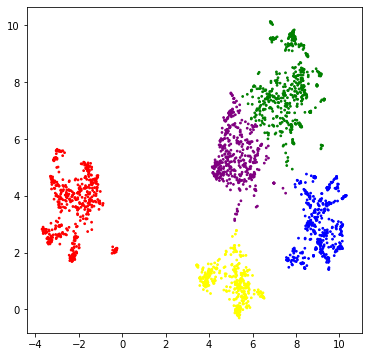

In [ ]:
plot_2D(X_w2v_bbc_umap,labels_umap_pred)

### **Interpretation**
By comparing the clustering performances of the different dimensionality reduction methodes we can arrive to observations and conclusions.

* Using the PCA methode can give us a hand on the flexibility of the dimension size, but the performance of the clustering done on the data can decrease since there's a chance we lose our discriment variables during the process
* The clustering Performed on PCA reduced data is way less performant even though we took a more or less large amount of Components.
* The clustering performed on t-SNE and UMAP reduced data is appreciable in terme of score and execution time, and we have only 2 dimensions (t-SNE gave the best performance)
* The clustering time increases relatively with the number of features and the distances between them

## **Cluster Estimations**
A fundamental step in unsupervised machine learning is to determine the optimal number of clusters that are present in our unlabeled dataset. In order to do so, we have multiple methodes :

### **Elbow Method**
The Elbow Method is used to determine the optial **K** (number of clusters) in **KMeans** algorithme. For that, we compare the ditorsions of the multiple clusterings according to k in a certain interval


In [ ]:
# For euclidian distance
from scipy.spatial.distance import cdist

In [ ]:
distortions3 = []
Ks = range(1,10)
for k in Ks:
    kmeanModel = KMeans(n_clusters=k,init="k-means++")
    kmeanModel.fit(X_w2v)
    distortions3.append(sum(np.min(cdist(X_w2v, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_w2v.shape[0])


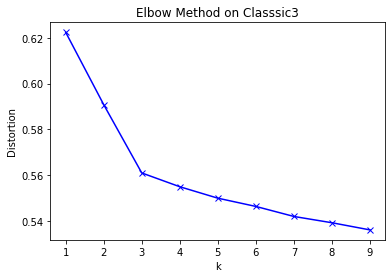

In [ ]:
plt.plot(Ks, distortions3, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method on Classsic3')
plt.show()

>To catch the optimal *K* for this dataset by selecting the value at the *Elbow* of the plot. Here the optimal number of clusters is *k=3*

In [ ]:
distortions4 = []
Ks = range(1,10)
for k in Ks:
    kmeanModel = KMeans(n_clusters=k,init="k-means++")
    kmeanModel.fit(X_w2v_4)
    distortions4.append(sum(np.min(cdist(X_w2v_4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_w2v_4.shape[0])

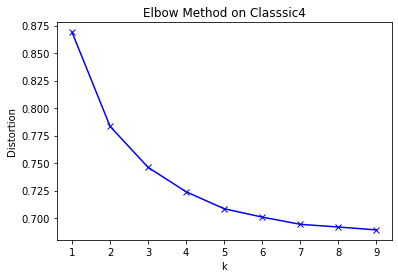

In [ ]:
plt.plot(Ks, distortions4, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method on Classsic4')
plt.show()

>**For this datasets, using this method lead us to select a *k=2*, but we know that we have 4 different classes in our dataset. Which can mean that the variables aren't very discriminating**

### **Silhouette Methode**

For n_clusters = 2 The average silhouette_score is : 0.61973745
For n_clusters = 3 The average silhouette_score is : 0.5565212
For n_clusters = 4 The average silhouette_score is : 0.58934575
For n_clusters = 5 The average silhouette_score is : 0.62240034
For n_clusters = 6 The average silhouette_score is : 0.5581444


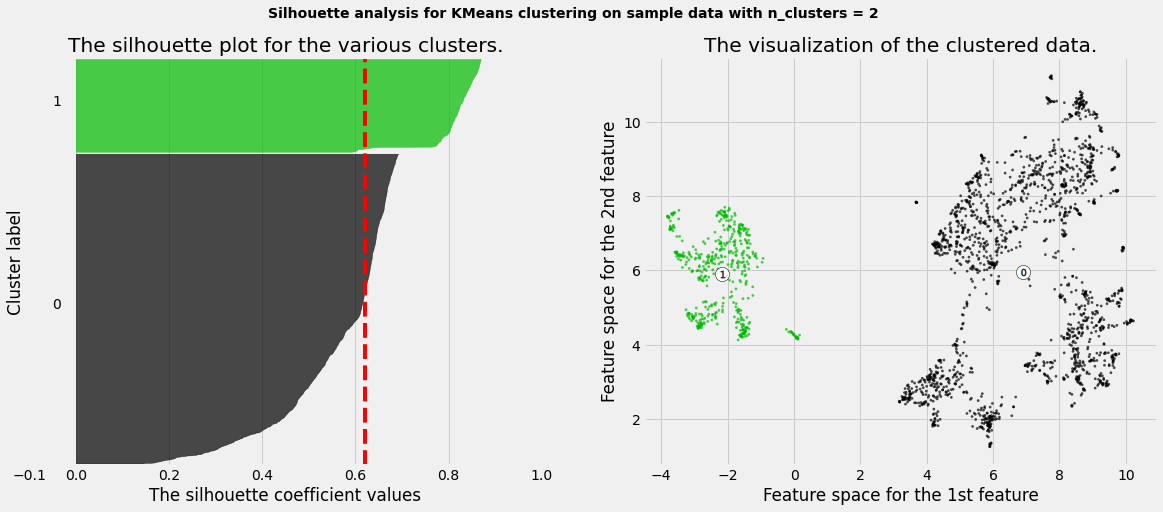

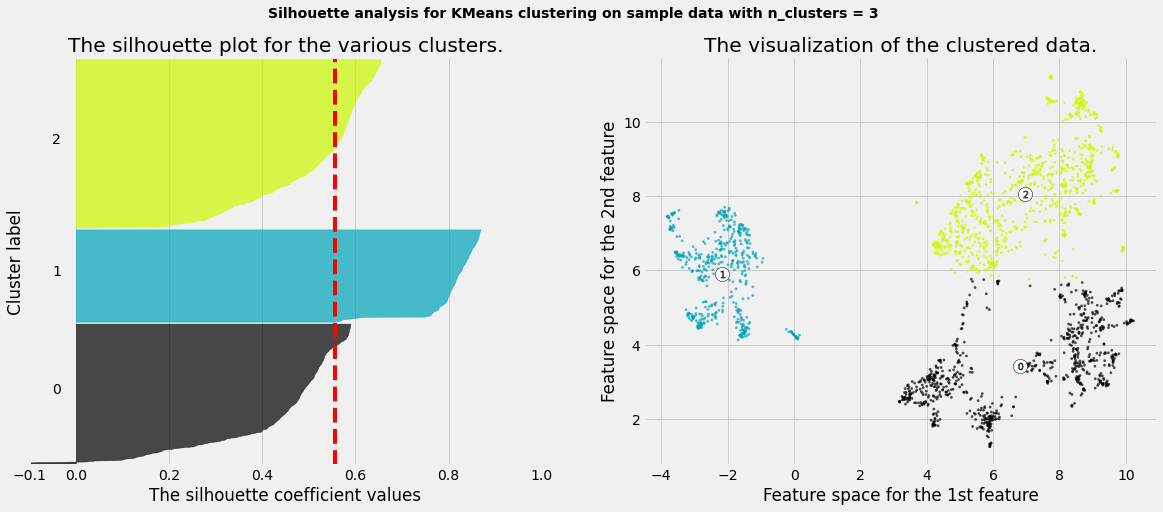

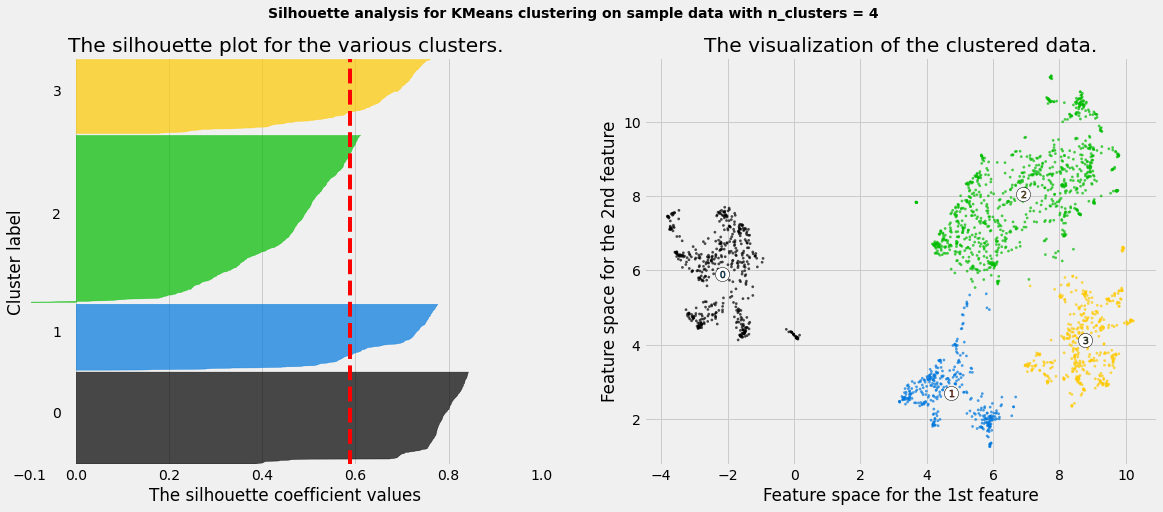

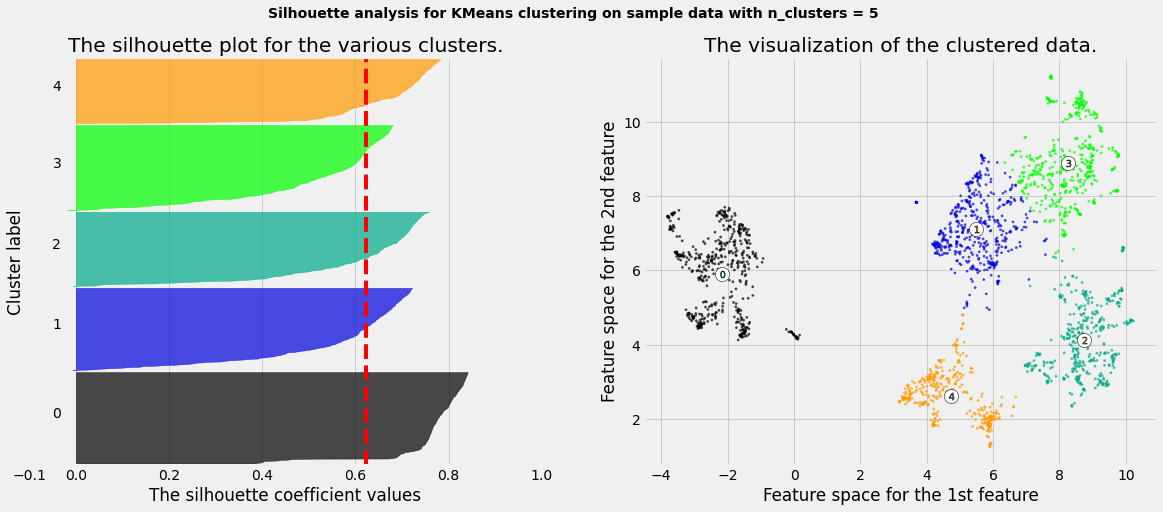

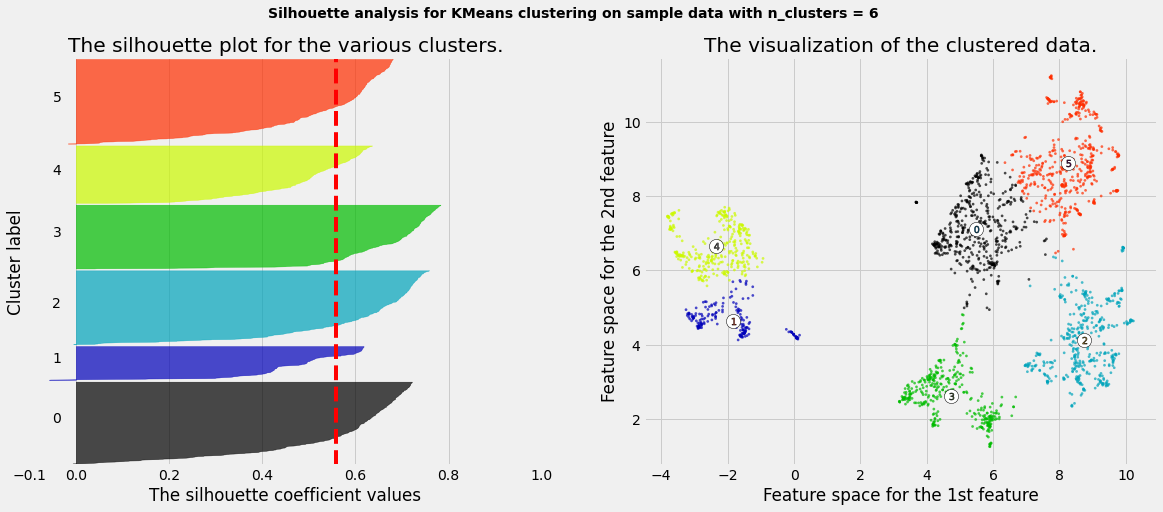

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_w2v_bbc_umap) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    kmeanModel = KMeans(n_clusters=n_clusters)
    labels_pred = kmeanModel.fit_predict(X_w2v_bbc_umap)

    silhouette_avg = silhouette_score(X_w2v_bbc_umap, labels_pred)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_w2v_bbc_umap, labels_pred)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels_pred.astype(float) / n_clusters)
    ax2.scatter(X_w2v_bbc_umap[:, 0], X_w2v_bbc_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeanModel.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

While examining the resulted plots we can see that:

* With 2 clusters we have a large difference in temre of thikness and size
* We can that k=4 is not adequate because clusters 2's points are below average
* With 5 clusters, we have similar thikness in the plots, little exception with cluster 0 because it's considerably far from the remaining clusters

> **We can conclude that the optimal number of cluster for this dataset is 5**

# **Part II : Simultaneous/Joined Approache**

## **Factorial Kmeans**

In [ ]:
from rpy2.robjects import numpy2ri
from rpy2.robjects.packages import importr # Fonction importr de
import rpy2.robjects as rl
#to install R package
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages("clustrd")


clustrd = importr('clustrd')







In [ ]:


# Convert the numpy of word2vec object to r object
embeddings = numpy2ri.numpy2rpy(X_w2v)
rprint = rl.globalenv.find("print")


In [ ]:
#Factorial K-means with 3 clusters in 2 dimensions
#with a Reduced K-means starting solution
data = rl.globalenv.find("data")
data(embeddings)
outFKM = clustrd.cluspca(embeddings, 3, 2, method = "FKM", rotation = "varimax",scale = False)
outFKM
#Scatterplot (dimensions 1 and 2) and cluster description plot
rplot = rl.globalenv.find("plot")


  |======================================================================| 100%

In [ ]:
utils.install_packages("lazyeval")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/lazyeval_0.2.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 83482 bytes (81 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fcd13bcb4b0> [RTYPES.NILSXP]

In [ ]:
grdevices = importr('grDevices')
grdevices.png(filename="/content/sample_data/FactorialKmeansScatter.png", width=812, height=512)
rplot(outFKM)
grdevices.dev_off()

<rpy2.robjects.vectors.IntVector object at 0x7fcd19fedaf0> [RTYPES.INTSXP]
R classes: ('integer',)
[1]

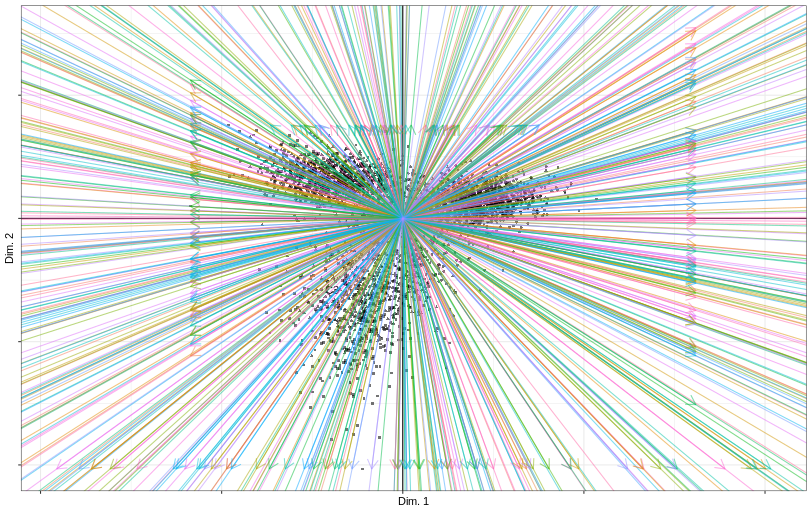

In [ ]:
from IPython.display import Image
Image('/content/sample_data/FactorialKmeansScatter.png')

In [ ]:
grdevices = importr('grDevices')
grdevices.png(filename="/content/sample_data/FactorialKmeansDesc.png", width=812, height=512)
rplot(outFKM,cludesc = True)
grdevices.dev_off()

<rpy2.robjects.vectors.IntVector object at 0x7fcd19df12d0> [RTYPES.INTSXP]
R classes: ('integer',)
[1]

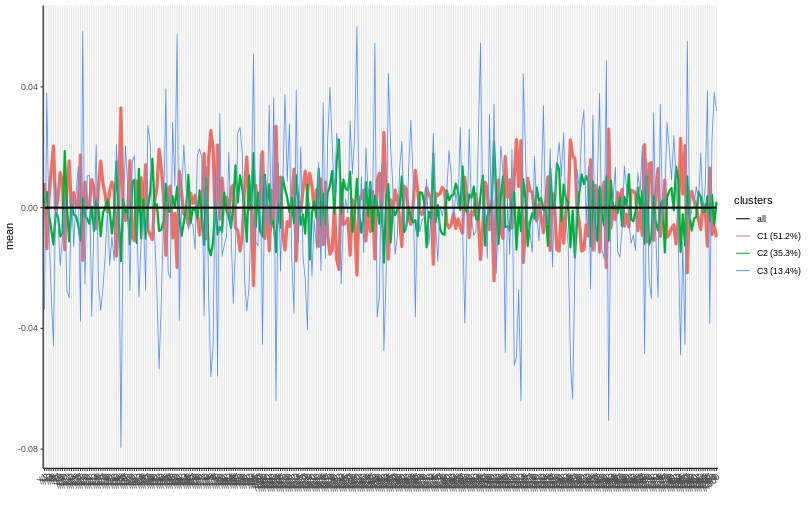

In [ ]:
Image('/content/sample_data/FactorialKmeansDesc.png')

In [ ]:
utils.install_packages("aricode")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/aricode_1.0.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 11710 bytes (11 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fcd13bcb4b0> [RTYPES.NILSXP]

In [ ]:
aricode = importr("aricode")
b = importr('base')


here we are computing NMI for factorial kmeans

In [ ]:
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter


int_true_labels = b.unlist(LabelEncoder().fit_transform(labels).tolist())
int_predectedFKM_labels = b.unlist(LabelEncoder().fit_transform(outFKM.rx2('cluster')).tolist())
aricode.NMI(int_true_labels,int_predectedFKM_labels)

<rpy2.robjects.vectors.FloatVector object at 0x7fcd147d2370> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.261823]

In [ ]:
aricode.ARI(int_true_labels,int_predectedFKM_labels)

<rpy2.robjects.vectors.FloatVector object at 0x7fcd19d4a550> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.293995]

## **Reduced KMEANS**

In [ ]:
outRKM = clustrd.cluspca(embeddings, 3, 2,  method = "RKM", rotation = "varimax", scale = False, nstart = 10)
outRKM

  |======================================================================| 100%

<rpy2.robjects.vectors.ListVector object at 0x7fcd15cdb5f0> [RTYPES.VECSXP]
R classes: ('cluspca',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., BoolSexpV..., BoolSexpV..., IntSexpVe...]
  obscoord: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x7fcd15c96b40> [RTYPES.REALSXP]
R classes: ('matrix', 'array')
[0.228095, -0.021018, -0.131920, 0.308070, ..., -0.169880, -0.105372, 0.310212, -0.115116]
  attcoord: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x7fcd15cae550> [RTYPES.REALSXP]
R classes: ('matrix', 'array')
[0.065707, -0.098365, 0.023156, 0.055763, ..., 0.049766, -0.024451, -0.104193, -0.065361]
  centroid: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x7fcd15cae820> [RTYPES.REALSXP]
R classes: ('matrix', 'array')
[0.203438, -0.023259, -0.368785, -0.110633, 0.234508, -0.162780]
  cluster: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x7fcd15cac190> [RTYPES.INTSXP]
R classes: ('integer',)
[1, 1, 3, 1, ..., 1, 1, 2, 3]
...
<rpy2.robjects.vectors.ListVector object at 0x7fcd15cdb5f0> [RTYPES.VECSXP]
R classes: ('cluspca',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., BoolSexpV..., BoolSexpV..., IntSexpVe...]
  odata: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fcd15d04aa0> [RTYPES.LGLSXP]
R classes: ('logical',)
[       0]
  scale: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fcd15d04410> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  center: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x7fcd15d045a0> [RTYPES.INTSXP]
R classes: ('integer',)
[10]

In [ ]:
grdevices.png(filename="/content/sample_data/ReducedKmeansScatter.png", width=812, height=512)
rplot(outRKM)
grdevices.dev_off()

<rpy2.robjects.vectors.IntVector object at 0x7fcd15cae910> [RTYPES.INTSXP]
R classes: ('integer',)
[1]

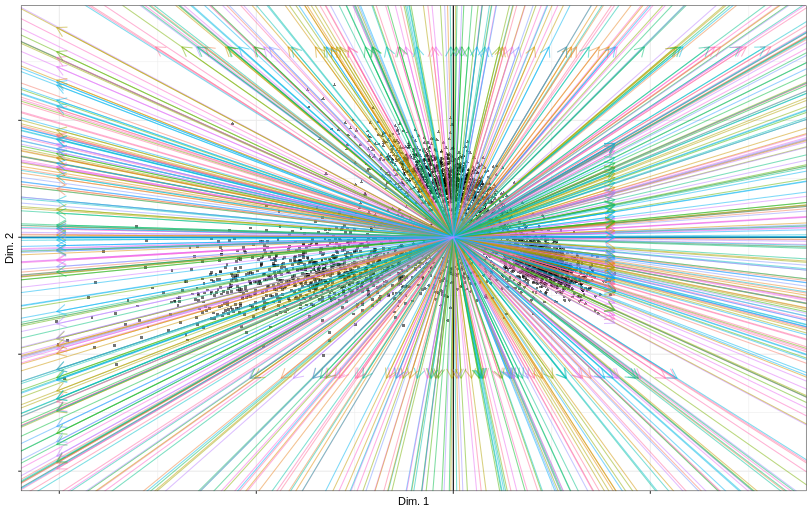

In [ ]:
Image('/content/sample_data/ReducedKmeansScatter.png')

In [ ]:
grdevices.png(filename="/content/sample_data/ReducedKmeansDesc.png", width=812, height=512)
rplot(outRKM,cludesc = True)
grdevices.dev_off()

<rpy2.robjects.vectors.IntVector object at 0x7fcd15cf2730> [RTYPES.INTSXP]
R classes: ('integer',)
[1]

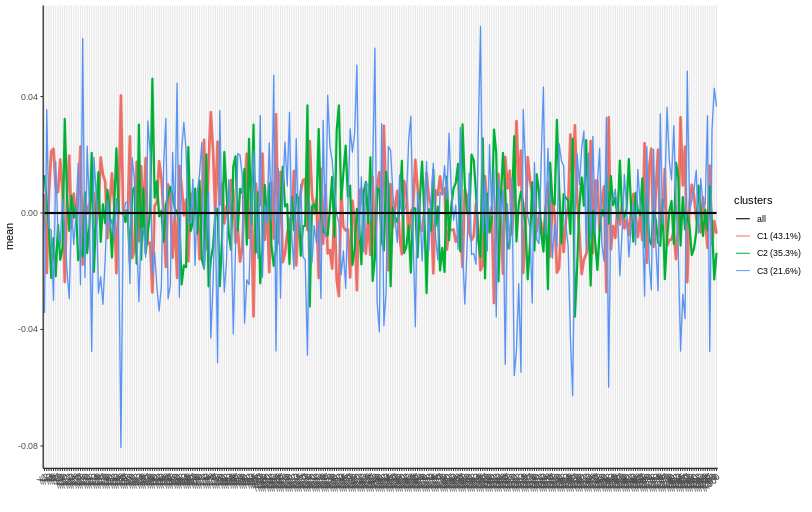

In [ ]:
Image('/content/sample_data/ReducedKmeansDesc.png')

In [ ]:
int_predectedRKM_labels = b.unlist(LabelEncoder().fit_transform(outRKM.rx2('cluster')).tolist())
aricode.NMI(int_true_labels,int_predectedRKM_labels)

<rpy2.robjects.vectors.FloatVector object at 0x7fcd17561d20> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.764880]

In [ ]:

aricode.ARI(int_true_labels,int_predectedRKM_labels)

<rpy2.robjects.vectors.FloatVector object at 0x7fcd16b7dd20> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.811100]

we notice that NMI and ARI score is way better using Reduced Kmeans than when using Factorial kmeans for this DataSet